# import libraries

In [1]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# gamma_pop

## dust + sulfate - sea salt

In [10]:
# no seasalt & dust
gamma_pop_nsd = np.zeros((2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            sce = int(filename[-29:-27])
            if (ncf.variables["gamma_pop_pr"].shape[0] != 49):
                print(sce)
                pass
            else:
                gamma_pop_nsd[0, sce, :] = ncf.variables["gamma_pop_pr"].data
                gamma_pop_nsd[1, sce, :] = ncf.variables["gamma_pop_comp"].data
                time = ncf.variables["time"].data/3600

gamma_pop_nsd_error = (gamma_pop_nsd[1,:].ravel() - 
               gamma_pop_nsd[0,:].ravel())/gamma_pop_nsd[0,:].ravel()    

d_wds = {"gamma_pop_ref": gamma_pop_nsd[0, :].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop_nsd[1, :].ravel(),
         "gamma_pop_error": gamma_pop_nsd_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_wds= pd.DataFrame(data=d_wds)
print(df_wds.shape)

df_wds_2ndngt = df_wds[((df_wds.index.values % 49) >=37) & ((df_wds.index.values % 49) <= 48)]
print(df_wds_2ndngt.shape)

df2 = df_wds_2ndngt.dropna()
print(df2.shape)
null_data = df_wds_2ndngt[df_wds_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

df3 = df_wds.dropna()
print(df3.shape)

77
(4900, 3)
(1200, 3)
(564, 3)
[ 6  6  6  6  6  6  6  6  6  6  6  6  8  8  8  8  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9  9  9  9  9 12 12 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 13 13 15 15 15 15 15 15 15 15 15 15 15 15
 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 20
 21 21 21 21 21 21 21 21 21 21 21 21 23 23 23 23 23 23 23 23 23 23 23 23
 25 25 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 26 26
 28 28 28 28 28 28 28 28 28 28 28 28 31 31 31 31 31 31 31 31 31 31 31 31
 32 32 32 32 32 32 32 32 32 32 32 32 38 38 38 38 38 38 38 38 38 38 38 38
 39 39 39 39 39 39 39 39 39 39 39 39 40 40 40 40 40 40 40 40 40 40 40 40
 41 41 41 41 41 41 41 41 41 41 41 41 42 42 42 42 42 42 42 42 42 42 42 42
 43 43 43 43 43 43 43 43 43 43 43 43 45 45 45 45 45 45 45 45 45 45 45 45
 51 51 51 51 51 51 51 51 51 51 51 51 52 52 52 52 52 52 52 52 52 52 52 52
 53 53 53 53 53 53 53 53 53 53 53 53 54 54 54 54 54 54 54 54 54 54 54 54
 56 56 56 56 56 56 

In [3]:
wds_case_index = df2.index.values
wds_sce_index  = (wds_case_index/49).astype(int)
wds_hour_index = wds_case_index % 49

df_wdson = df2[((np.abs(df2["gamma_pop_error"])) <= 20)]
df_wdsabove = df2[((df2["gamma_pop_error"]) > 20)]
df_wdsbelow = df2[((df2["gamma_pop_error"]) < -20)]
print(df_wdson.shape, df_wdsabove.shape, df_wdsbelow.shape)

wdsall_case_index = df3.index.values
wdsall_sce_index  = (wdsall_case_index/49).astype(int)
wdsall_hour_index = wdsall_case_index % 49

df_wdsallon = df3[((np.abs(df3["gamma_pop_error"])) <= 20)]
df_wdsallabove = df3[((df3["gamma_pop_error"]) > 20)]
df_wdsallbelow = df3[((df3["gamma_pop_error"]) < -20)]
print(df_wdsallon.shape, df_wdsallabove.shape, df_wdsallbelow.shape)

(506, 3) (37, 3) (21, 3)
(2153, 3) (130, 3) (187, 3)


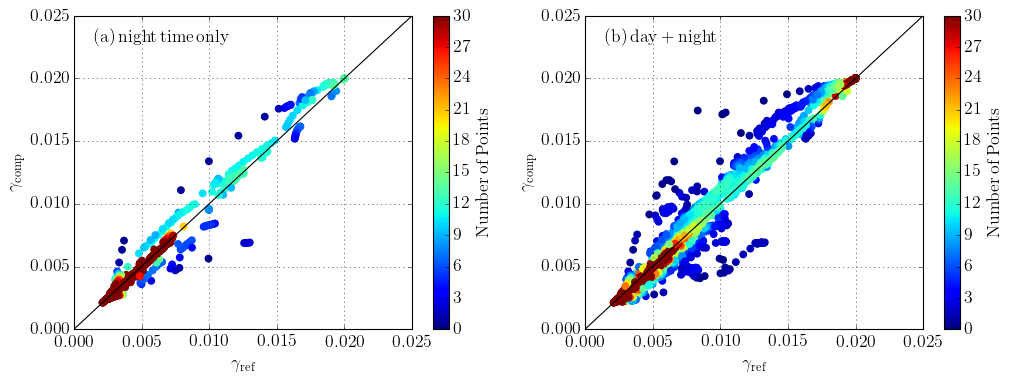

In [4]:
# Only nighttime cases

from scipy.stats import gaussian_kde
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df2["gamma_pop_ref"]
y = df2["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=30)
cbar = plt.colorbar()
cbar.set_label(r'$\rm Number\,of\,Points$')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (a)\,night \,time \,only$')
plt.grid()
###################
plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df3["gamma_pop_ref"]
y = df3["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=30)
cbar = plt.colorbar()
cbar.set_label(r'$\rm Number\,of\,Points$')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (b)\,day + night$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')

# bulk masses

In [40]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
dtype: object
bulk_no3_masses


In [6]:
# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo'
bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            if (ncf.variables['bulk_no3_masses'].shape[0] != 49):
                print(sce)
                pass
            else:
                for i in range(10):
                    bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                    bulk_masses[11, sce, :] = ncf.variables['tot_drymass_conc'].data * 1e9

d_wdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df_wdm = pd.DataFrame(data=d_wdm)
print(df_wdm.shape)
df_wdm_2ndngt = df_wdm[((df_wdm.index.values % 49) >= 37) & ((df_wdm.index.values % 49) <= 48)]  # ngt: night
print(df_wdm_2ndngt.shape)

no3 = sum(bulk_masses[0,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
so4 = sum(bulk_masses[1,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
oc = sum(bulk_masses[2,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
soa = sum(bulk_masses[3,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
nh4 = sum(bulk_masses[4,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
na = sum(bulk_masses[5,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
cl = sum(bulk_masses[6,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
bc = sum(bulk_masses[7,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
oin = sum(bulk_masses[8,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
ca = sum(bulk_masses[9,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
co3 = sum(bulk_masses[10,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3)

77
(4900, 10)
(1200, 10)
no3: 0.2615746583761921
so4: 0.046647563929324266
oc: 0.05519438681557062
soa: 0.03952642964231219
nh4: 0.0930184810305109
na: 0.0
cl: 0.007140029641317774
bc: 0.04013804675546222
oin: 0.4567604038093062
ca: 0.0
co3: 0.0
0.9999999999999962


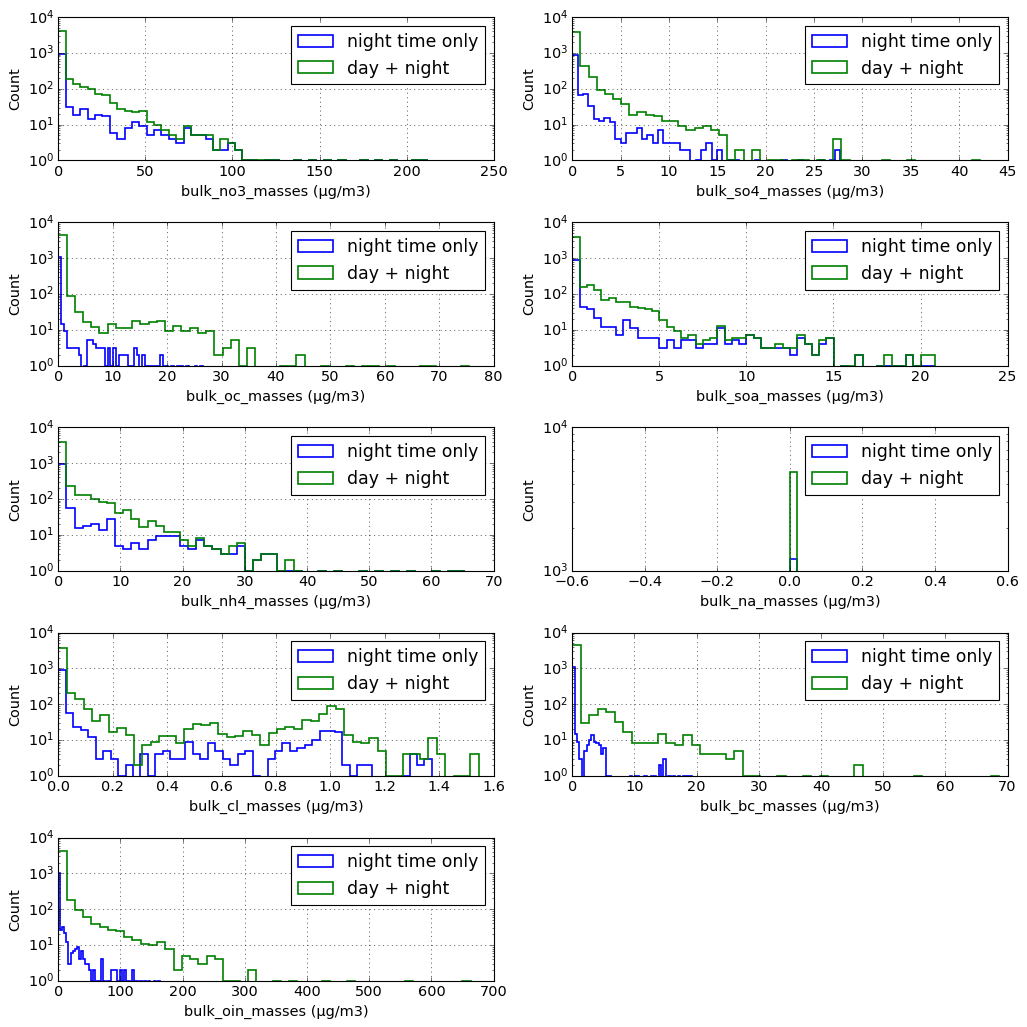

In [7]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(13,13))

for i in range(9):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_wdm_2ndngt, x = 'bulk_'+ s[i] + '_masses', bins = 50, histtype = 'step', lw = 1.5, label = 'night time only')
    plt.hist(data = df_wdm, x = 'bulk_'+ s[i] + '_masses', bins = 50, histtype = 'step', lw = 1.5, label = 'day + night')
    plt.xlabel('bulk_'+ s[i] + '_masses (µg/m3)')
    plt.yscale('log')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.grid()
    plt.legend()
    plt.tight_layout(pad = 1.0)

# composition distribution

In [4]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
dtype: object
bulk_no3_masses


In [11]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo/scenarios/scenario_0012'
nmass_frac_dist = np.zeros((10,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

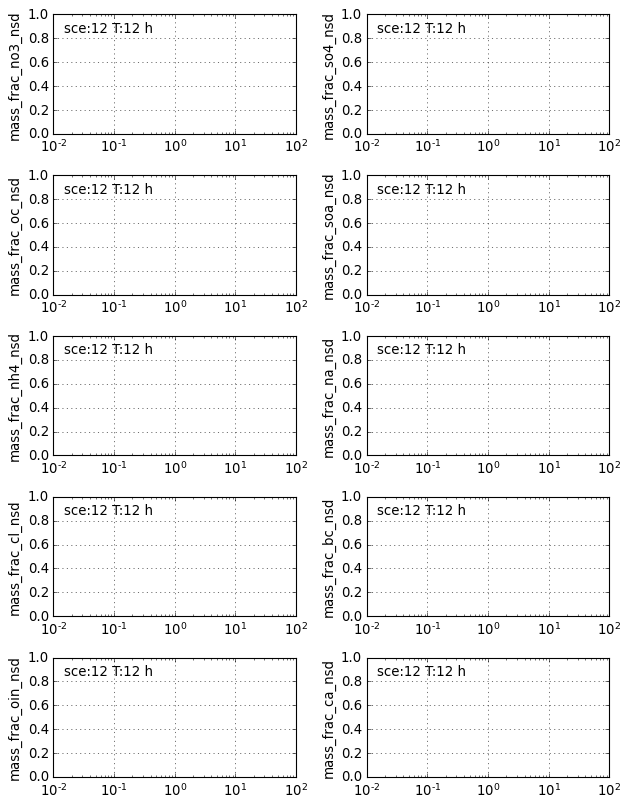

In [14]:
plt.figure(figsize=(8,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(10):
    plt.subplot(10,2,i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[i,12,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e2)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.ylabel("mass_frac_" + s[i] + "_nsd")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (12, 12))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

In [2]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
dtype: object
bulk_no3_masses


In [3]:
# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo/scenarios/scenario_0078'
bulk_masses = np.zeros((12,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename)
            for i in range(10):
                bulk_masses[i, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                bulk_masses[11, :] = ncf.variables['tot_drymass_conc'].data * 1e9

d_wdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:].ravel() + bulk_masses[3,:].ravel()}
df_wdm = pd.DataFrame(data=d_wdm)
print(df_wdm.shape)
df_wdm_2ndngt = df_wdm[((df_wdm.index.values % 49) >= 37) & ((df_wdm.index.values % 49) <= 48)]  # ngt: night
print(df_wdm_2ndngt.shape)

no3 = sum(bulk_masses[0,:].ravel())/sum(bulk_masses[11,:].ravel())
so4 = sum(bulk_masses[1,:].ravel())/sum(bulk_masses[11,:].ravel())
oc = sum(bulk_masses[2,:].ravel())/sum(bulk_masses[11,:].ravel())
soa = sum(bulk_masses[3,:].ravel())/sum(bulk_masses[11,:].ravel())
nh4 = sum(bulk_masses[4,:].ravel())/sum(bulk_masses[11,:].ravel())
na = sum(bulk_masses[5,:].ravel())/sum(bulk_masses[11,:].ravel())
cl = sum(bulk_masses[6,:].ravel())/sum(bulk_masses[11,:].ravel())
bc = sum(bulk_masses[7,:].ravel())/sum(bulk_masses[11,:].ravel())
oin = sum(bulk_masses[8,:].ravel())/sum(bulk_masses[11,:].ravel())
ca = sum(bulk_masses[9,:].ravel())/sum(bulk_masses[11,:].ravel())
co3 = sum(bulk_masses[10,:].ravel())/sum(bulk_masses[11,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3)

(49, 10)
(12, 10)
no3: 0.06227181448814882
so4: 0.018554140582404885
oc: 0.0056267875669751685
soa: 0.037146677213755766
nh4: 0.025135633319260997
na: 0.0
cl: 0.000507795568019704
bc: 0.18486111488657406
oin: 0.6658960363748593
ca: 0.0
co3: 0.0
0.9999999999999987


In [36]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo/scenarios/scenario_0007'
nmass_frac_dist = np.zeros((10,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            # print(filename)
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

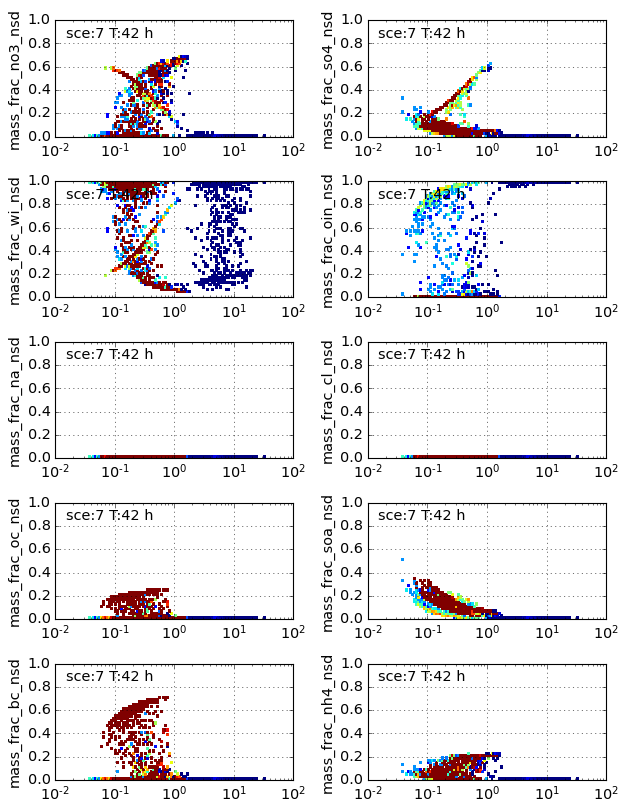

In [37]:
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(8,20))

X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(10):
    plt.subplot(10,2,i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[i,42,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e2)
    plt.xscale('log')
    # plt.ylim(0,1)
    plt.ylabel('mass_frac_' + s[i] + '_nsd')
    plt.yscale('linear')
    plt.text(0.015, 0.85, 'sce:%d T:%d h'% (7, 42))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

In [ ]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

In [42]:
# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo/scenarios/scenario_0007'
bulk_masses = np.zeros((12,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename)
            for i in range(10):
                bulk_masses[i, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                bulk_masses[11, :] = ncf.variables['tot_drymass_conc'].data * 1e9

d_wdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:].ravel() + bulk_masses[3,:].ravel()}
df_wdm = pd.DataFrame(data=d_wdm)
print(df_wdm.shape)
df_wdm_2ndngt = df_wdm[((df_wdm.index.values % 49) >= 37) & ((df_wdm.index.values % 49) <= 48)]  # ngt: night
print(df_wdm_2ndngt.shape)

no3 = sum(bulk_masses[0,:].ravel())/sum(bulk_masses[11,:].ravel())
so4 = sum(bulk_masses[1,:].ravel())/sum(bulk_masses[11,:].ravel())
oc = sum(bulk_masses[2,:].ravel())/sum(bulk_masses[11,:].ravel())
soa = sum(bulk_masses[3,:].ravel())/sum(bulk_masses[11,:].ravel())
nh4 = sum(bulk_masses[4,:].ravel())/sum(bulk_masses[11,:].ravel())
na = sum(bulk_masses[5,:].ravel())/sum(bulk_masses[11,:].ravel())
cl = sum(bulk_masses[6,:].ravel())/sum(bulk_masses[11,:].ravel())
bc = sum(bulk_masses[7,:].ravel())/sum(bulk_masses[11,:].ravel())
oin = sum(bulk_masses[8,:].ravel())/sum(bulk_masses[11,:].ravel())
ca = sum(bulk_masses[9,:].ravel())/sum(bulk_masses[11,:].ravel())
co3 = sum(bulk_masses[10,:].ravel())/sum(bulk_masses[11,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3)

(49, 10)
(12, 10)
no3: 0.17292371358034261
so4: 0.029425029519263464
oc: 0.05217708958320484
soa: 0.03791555827590263
nh4: 0.06171485056210576
na: 0.0
cl: 0.004879486951821759
bc: 0.14827273593813545
oin: 0.49269153558922374
ca: 0.0
co3: 0.0
1.0000000000000004


# size distribution

In [13]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo'
h1_wds = np.zeros((100,49,180)) # gamma * surf_dist
h2_wds = np.zeros((100,49,180)) # surf_area_dist
hgamma_wds = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1_wds[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h2_wds[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            hgamma_wds[sce_index, t_index,:] = h1_wds[sce_index, t_index,:]/h2_wds[sce_index, t_index,:]

In [14]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo'
surf_area_dist = np.zeros((100,49,180)) # for PR
mass_dist = np.zeros((100,49,180)) # for CA
num_dist = np.zeros((100,49,180))
no3_dist = np.zeros((100,49,180))
so4_dist = np.zeros((100,49,180))
wi_dist = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            surf_area_dist[sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            mass_dist[sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e9 # kg to µg
            num_dist[sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3
            no3_dist[sce_index,t_index,:] = ncf.variables["mass_no3_dist"].data*1e9
            so4_dist[sce_index,t_index,:] = ncf.variables["mass_so4_dist"].data*1e9
            wi_dist[sce_index,t_index,:] = so4_dist[sce_index,t_index,:]/(so4_dist[sce_index,t_index,:]+no3_dist[sce_index,t_index,:])

In [15]:
print(df_wdsallbelow.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_wdsallbelow.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wdsallbelow.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
3844       0.010283        0.004507       -56.175640
3845       0.010617        0.004682       -55.899600
3843       0.010014        0.004458       -55.483241
3846       0.010708        0.004790       -55.265574
3842       0.010364        0.004928       -52.450981
...             ...             ...              ...
1109       0.007161        0.005700       -20.403537
1819       0.002915        0.002320       -20.400757
1110       0.007298        0.005815       -20.327570
2432       0.009510        0.007588       -20.215027
550        0.005320        0.004248       -20.153739

[187 rows x 3 columns]
[78 78 78 78 78  7  7 78  7  7 37 78 78 78 78 78 78 78 78  7 78 78 78 78
 78 78 78 78 37 78 78  7  7 78  7  7  7  7  7  7  7  7  7  7  7  7 37  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7 78  7 81 81 81 81
 81 81 81 81 81 81 81 81 81 81 81 81 37 81 22 78 78 78 37 78 78 78  7 78
 78 78 78 78 37 22 78 78 78 81 78 37 37 81 37 78

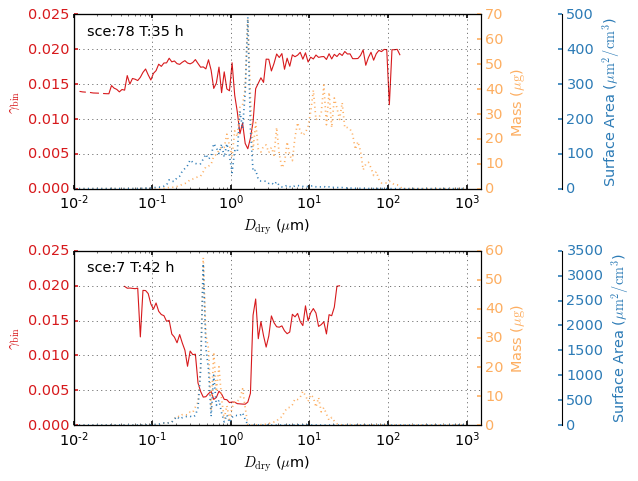

In [16]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([78,7])
t_index = pd.Series([35,42])

for i in range(2):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wds[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm \mu g$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

<Figure size 640x1600 with 0 Axes>

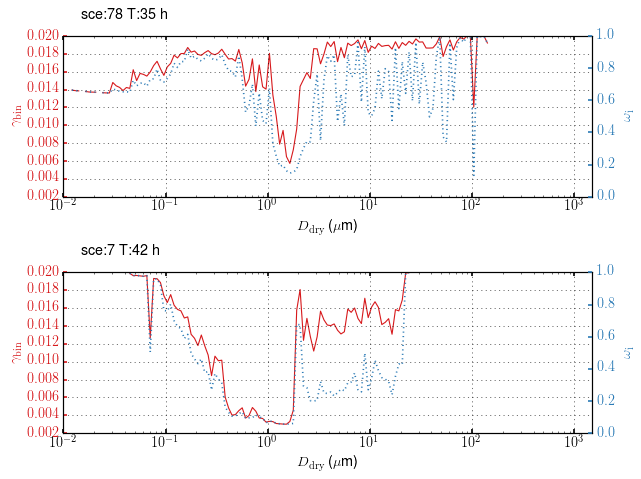

In [31]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(8,20))

fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([78,7])
t_index = pd.Series([35,42])

for i in range(2):
    twin1 = ax[i].twinx()

    p1 = ax[i].plot(diam, hgamma_wds[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, wi_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0.002,0.02)
    twin1.set_ylim(0, 1)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'$\rm \omega_i$')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

In [17]:
print(df_wdsallabove.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_wdsallabove.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wdsallabove.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
4075       0.013846        0.016624        20.058127
4112       0.014112        0.016951        20.118099
2346       0.007734        0.009295        20.195048
132        0.005545        0.006666        20.222970
2331       0.007924        0.009529        20.251691
...             ...             ...              ...
4667       0.005301        0.010684       101.522951
4671       0.005263        0.010637       102.111171
4670       0.005718        0.011574       102.426981
2991       0.006596        0.013385       102.920043
2990       0.008334        0.017441       109.282409

[130 rows x 3 columns]
[83 83 47  2 47 75 95 83 48 48  2  2 83 83 83  2  2 47  2  2 47  2  2  2
 75 48 83  2 47 83 83 47 83  2 47  2 95 83 83 47 83 83 47  2 47 47 47 48
 14  2  2 47 47 47 83 95 47  2 48  2 14 14 14  2 14 14 14 14 14 14 48  2
 61 83 95 48 48 14 61 83 95 95 61 95 95 95 95 95 95 95 95 95 95 95 61 95
 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95

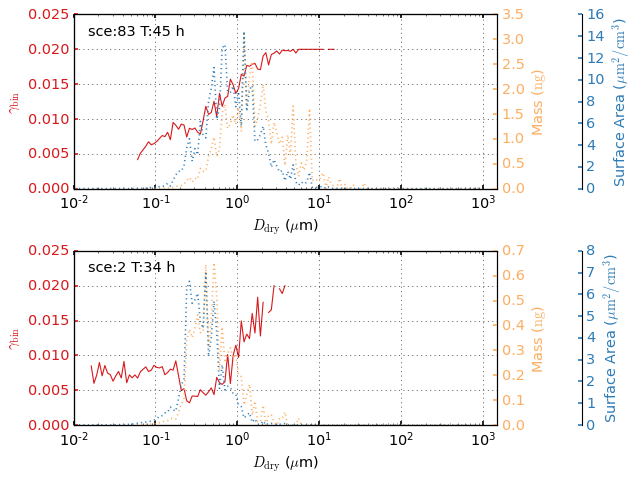

In [18]:
fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([83,2])
t_index = pd.Series([45,34])

for i in range(2):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))

    p1 = ax[i].plot(diam, hgamma_wds[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0,0.025)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm ng$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')